# **Análisis Exploratorio de Datos (EDA)**

**Objetivo:** Conocer las características de los datos, detectar patrones iniciales y posibles problemas (valores faltantes, outliers, etc.).



---
### **Cargar y explorar los datos**
---
**Carga del dataset e importacion de bibliotecas:** 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson
# from src import merge
file_path = '../db/BTCUSD_d.csv' 
crypto_data = pd.read_csv(file_path)
crypto_data['date'] = pd.to_datetime(crypto_data['date'])

# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")


# Análisis 1: Tendencias de precios y volumen
Analizamos la evolución del precio de cierre y el volumen de transacciones a lo largo del tiempo mediante gráficos de línea.

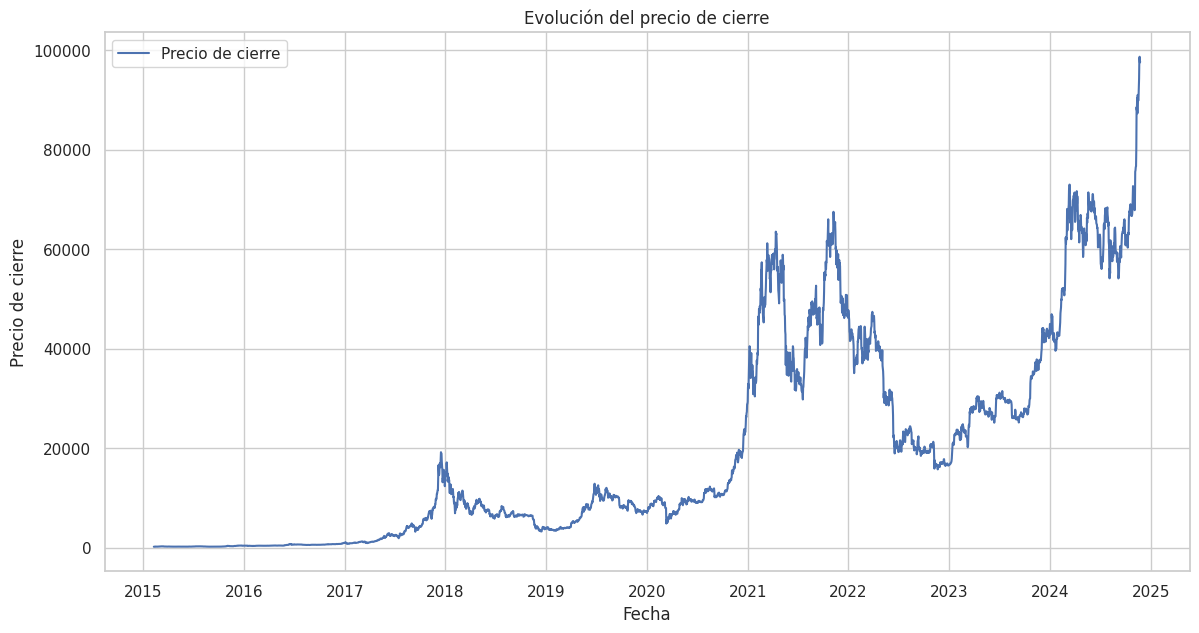

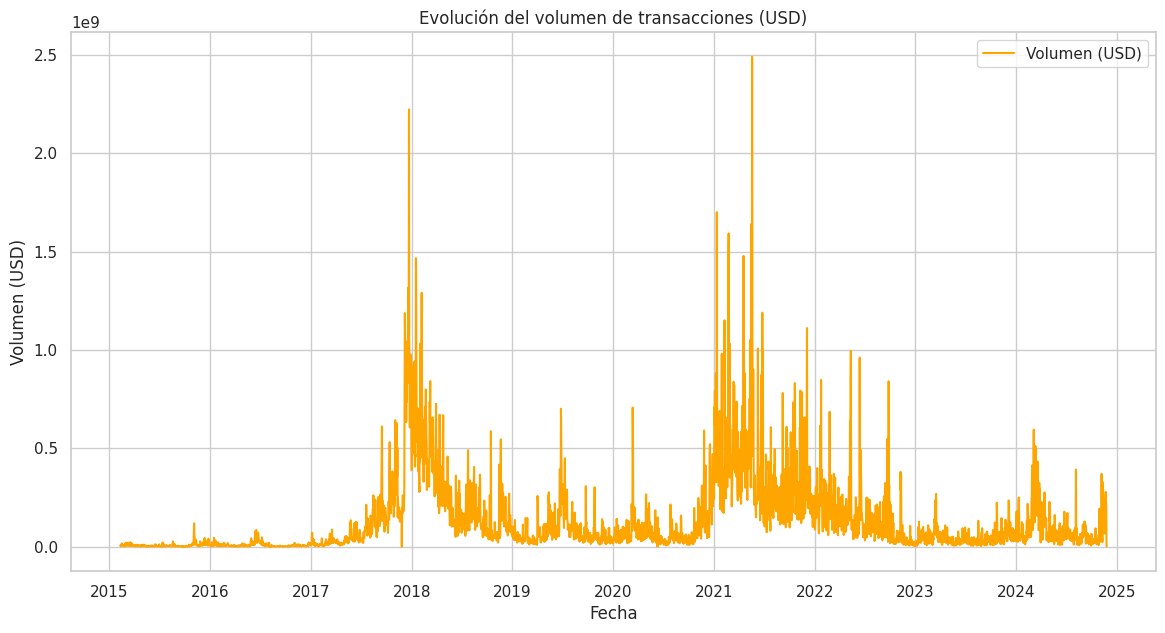

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(crypto_data['date'], crypto_data['close'], label='Precio de cierre')
plt.title('Evolución del precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(crypto_data['date'], crypto_data['Volume USD'], label='Volumen (USD)', color='orange')
plt.title('Evolución del volumen de transacciones (USD)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (USD)')
plt.legend()
plt.show()

# Análisis 2: Promedios móviles
Calculamos medias móviles de 7 y 30 días para suavizar las fluctuaciones de los precios y detectar tendencias.

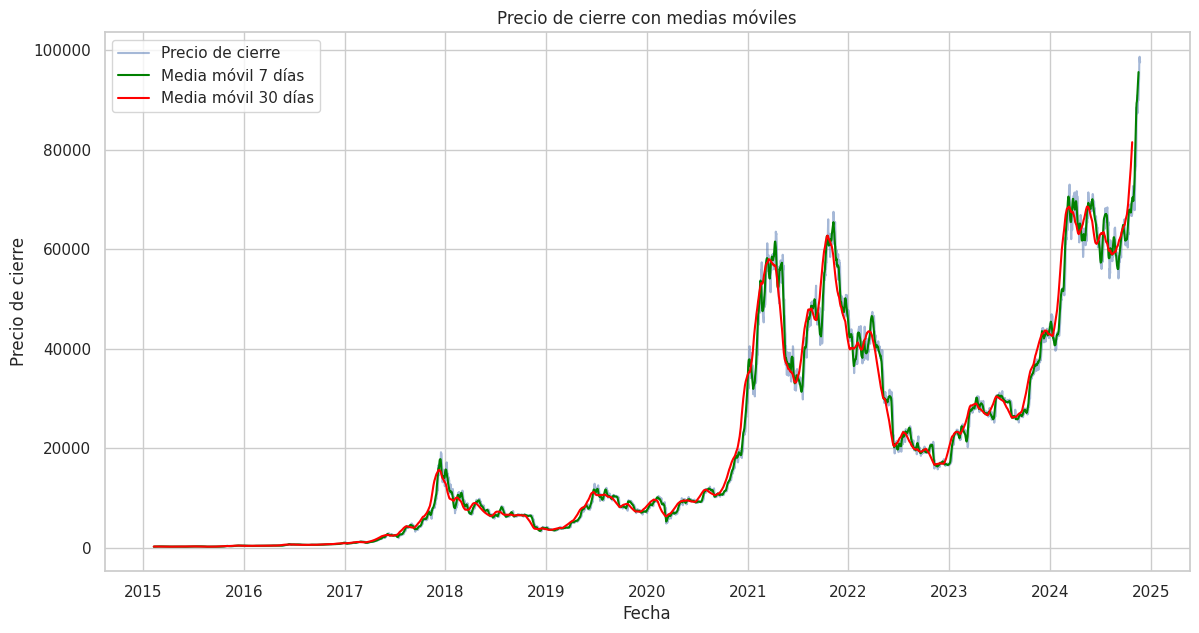

In [4]:
crypto_data['ma_7'] = crypto_data['close'].rolling(window=7).mean()
crypto_data['ma_30'] = crypto_data['close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(crypto_data['date'], crypto_data['close'], label='Precio de cierre', alpha=0.5)
plt.plot(crypto_data['date'], crypto_data['ma_7'], label='Media móvil 7 días', color='green')
plt.plot(crypto_data['date'], crypto_data['ma_30'], label='Media móvil 30 días', color='red')
plt.title('Precio de cierre con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

# Análisis 3: Distribución de la volatilidad
Analizamos la distribución de la volatilidad utilizando
un histograma con una curva KDE (Kernel Density Estimate).

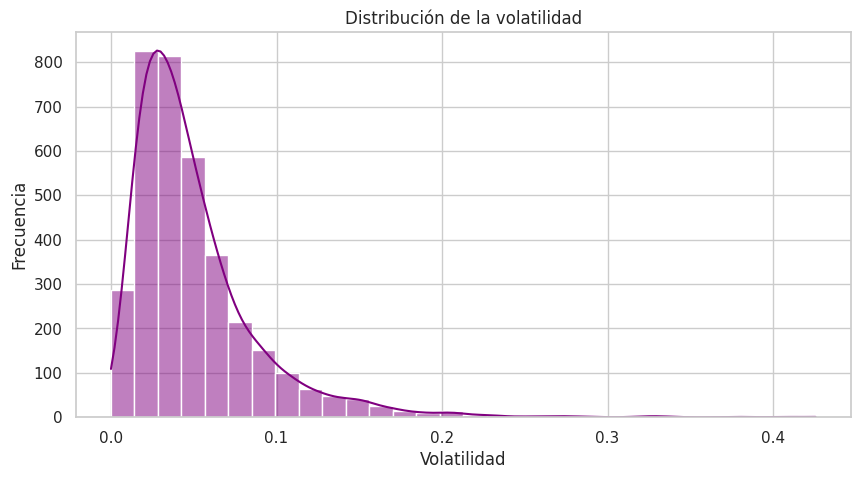

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(crypto_data['volatility'], kde=True, bins=30, color='purple')
plt.title('Distribución de la volatilidad')
plt.xlabel('Volatilidad')
plt.ylabel('Frecuencia')
plt.show()


# Pruebas de distribución para la volatilidad
 Realizamos pruebas estadísticas para verificar si los datos
 de volatilidad siguen una distribución normal.
 - Shapiro-Wilk
 - D'Agostino
 - Anderson-Darling

In [6]:
stat, p = shapiro(crypto_data['volatility'])
print(f"Prueba de Shapiro-Wilk: Estadístico={stat}, p-valor={p}")

stat, p = normaltest(crypto_data['volatility'])
print(f"Prueba de D'Agostino: Estadístico={stat}, p-valor={p}")

result = anderson(crypto_data['volatility'])
print('Prueba de Anderson-Darling:')
for i in range(len(result.critical_values)):
    sig_level, crit_value = result.significance_level[i], result.critical_values[i]
    print(f"Nivel de significancia: {sig_level}%, Valor crítico: {crit_value}, Estadístico: {result.statistic}")

Prueba de Shapiro-Wilk: Estadístico=0.7933054065374714, p-valor=1.7130894867759363e-55
Prueba de D'Agostino: Estadístico=2079.5804045995947, p-valor=0.0
Prueba de Anderson-Darling:
Nivel de significancia: 15.0%, Valor crítico: 0.575, Estadístico: 162.65860399601888
Nivel de significancia: 10.0%, Valor crítico: 0.655, Estadístico: 162.65860399601888
Nivel de significancia: 5.0%, Valor crítico: 0.786, Estadístico: 162.65860399601888
Nivel de significancia: 2.5%, Valor crítico: 0.917, Estadístico: 162.65860399601888
Nivel de significancia: 1.0%, Valor crítico: 1.091, Estadístico: 162.65860399601888


# Análisis 4: Rangos de precios
Calculamos el rango diario como la diferencia entre el precio máximo (high) y el precio mínimo (low).

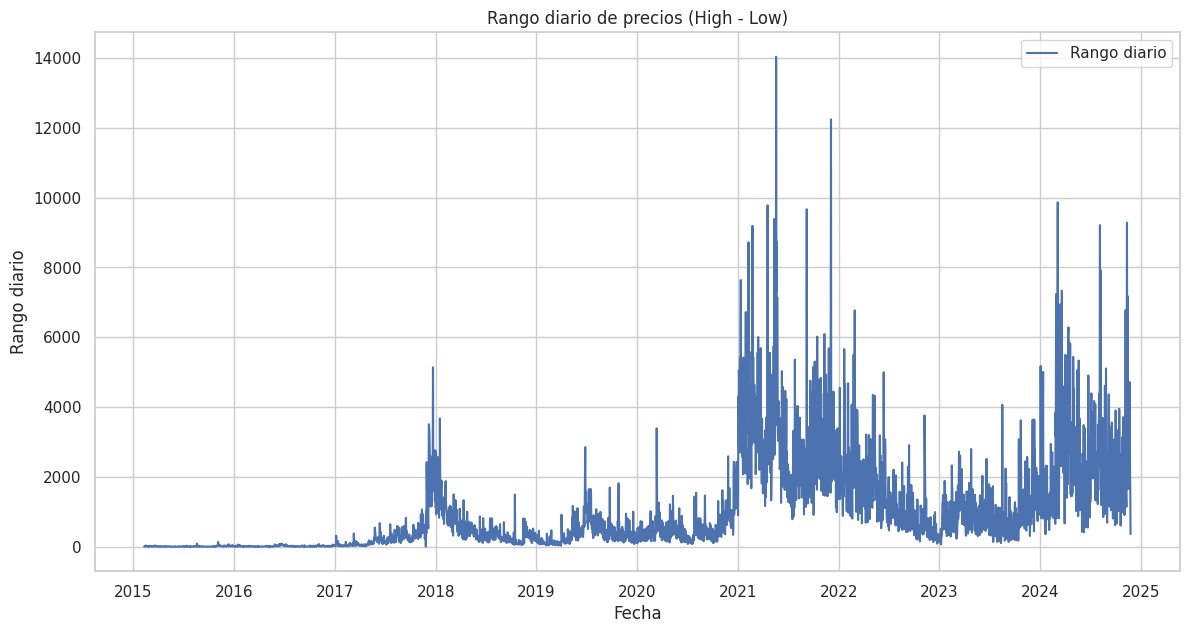

In [7]:
crypto_data['daily_range'] = crypto_data['high'] - crypto_data['low']

plt.figure(figsize=(14, 7))
plt.plot(crypto_data['date'], crypto_data['daily_range'], label='Rango diario')
plt.title('Rango diario de precios (High - Low)')
plt.xlabel('Fecha')
plt.ylabel('Rango diario')
plt.legend()
plt.show()

# Análisis 5: Cambios porcentuales diarios
Calculamos los cambios porcentuales diarios en el precio de cierre y analizamos su distribución.

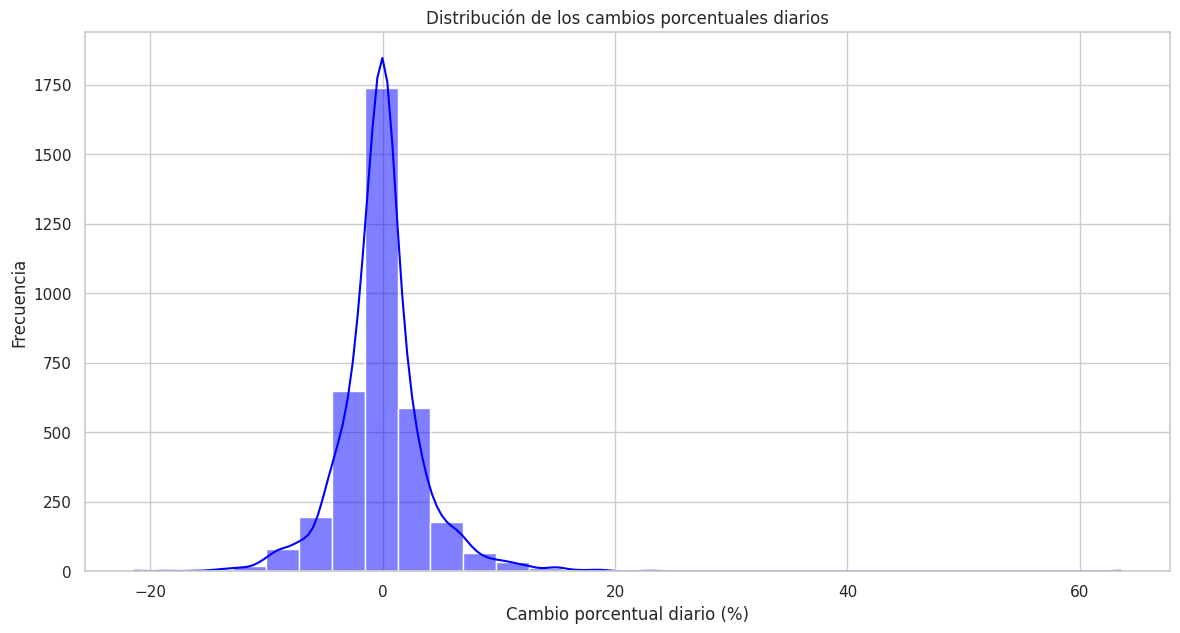

In [8]:
crypto_data['daily_return'] = crypto_data['close'].pct_change() * 100

plt.figure(figsize=(14, 7))
sns.histplot(crypto_data['daily_return'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribución de los cambios porcentuales diarios')
plt.xlabel('Cambio porcentual diario (%)')
plt.ylabel('Frecuencia')
plt.show()

# Pruebas de distribución para los cambios porcentuales diarios
Aplicamos las mismas pruebas estadísticas que para la volatilidad pero ahora sobre los cambios porcentuales diarios.

In [9]:
stat, p = shapiro(crypto_data['daily_return'].dropna())
print(f"Prueba de Shapiro-Wilk para cambios porcentuales: Estadístico={stat}, p-valor={p}")

stat, p = normaltest(crypto_data['daily_return'].dropna())
print(f"Prueba de D'Agostino para cambios porcentuales: Estadístico={stat}, p-valor={p}")

result = anderson(crypto_data['daily_return'].dropna())
print('Prueba de Anderson-Darling para cambios porcentuales:')
for i in range(len(result.critical_values)):
    sig_level, crit_value = result.significance_level[i], result.critical_values[i]
    print(f"Nivel de significancia: {sig_level}%, Valor crítico: {crit_value}, Estadístico: {result.statistic}")


Prueba de Shapiro-Wilk para cambios porcentuales: Estadístico=0.8842989914993452, p-valor=1.0602206592478017e-45
Prueba de D'Agostino para cambios porcentuales: Estadístico=1893.7562747854508, p-valor=0.0
Prueba de Anderson-Darling para cambios porcentuales:
Nivel de significancia: 15.0%, Valor crítico: 0.575, Estadístico: 81.69409703253405
Nivel de significancia: 10.0%, Valor crítico: 0.655, Estadístico: 81.69409703253405
Nivel de significancia: 5.0%, Valor crítico: 0.786, Estadístico: 81.69409703253405
Nivel de significancia: 2.5%, Valor crítico: 0.917, Estadístico: 81.69409703253405
Nivel de significancia: 1.0%, Valor crítico: 1.091, Estadístico: 81.69409703253405


# Análisis 6: Relación entre volumen y precios
 Analizamos cómo se relaciona el volumen de transacciones (en USD) con el precio de cierre mediante un scatter plot.

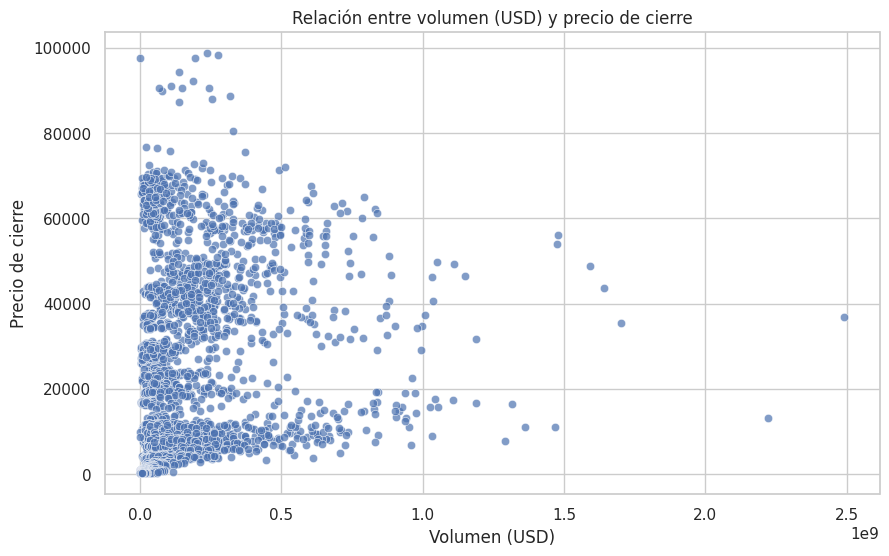

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crypto_data, x='Volume USD', y='close', alpha=0.7)
plt.title('Relación entre volumen (USD) y precio de cierre')
plt.xlabel('Volumen (USD)')
plt.ylabel('Precio de cierre')
plt.show()

# Análisis 7: Relación entre Volatilidad y Precios de cierre

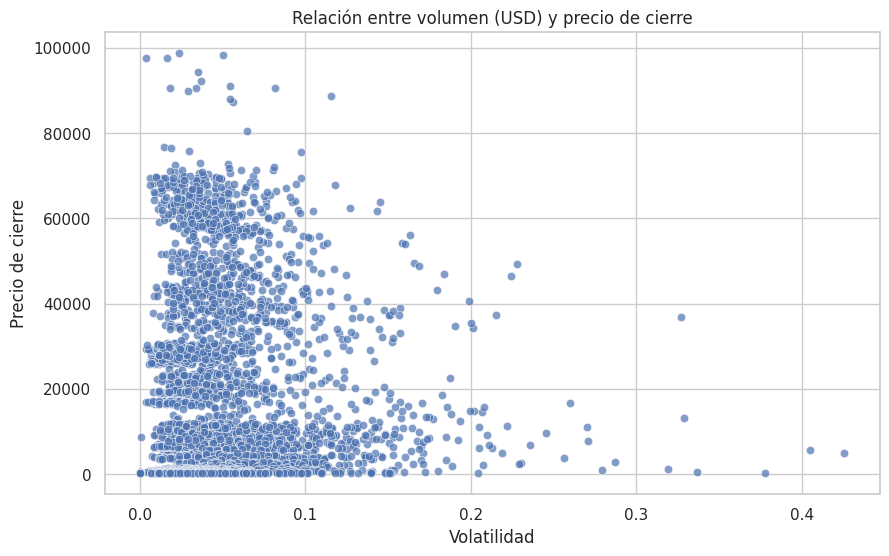

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crypto_data, x='volatility', y='close', alpha=0.7)
plt.title('Relación entre volumen (USD) y precio de cierre')
plt.xlabel('Volatilidad')
plt.ylabel('Precio de cierre')
plt.show()

# Análisis 8: Máximos y mínimos históricos
 Identificamos el precio máximo y mínimo históricos, así como las fechas en las que ocurrieron.

In [12]:
max_price = crypto_data['high'].max()
min_price = crypto_data['low'].min()
max_date = crypto_data.loc[crypto_data['high'].idxmax(), 'date']
min_date = crypto_data.loc[crypto_data['low'].idxmin(), 'date']

print(f"El precio máximo histórico fue {max_price} el {max_date}.")
print(f"El precio mínimo histórico fue {min_price} el {min_date}.")

El precio máximo histórico fue 99334.0 el 2024-11-22 00:00:00.
El precio mínimo histórico fue 162.0 el 2015-08-19 00:00:00.


# Análisis 9: Volumen y Volatilidad más altos
Determinamos el día con el mayor volumen de transacciones y mostramos su valor y fecha.

In [13]:
max_volume = crypto_data['Volume USD'].max()
max_volatility = crypto_data['volatility'].max()
max_volume_date = crypto_data.loc[crypto_data['Volume USD'].idxmax(), 'date']
max_volatility_date = crypto_data.loc[crypto_data['volatility'].idxmax(), 'date']
print(f"El mayor volumen de transacciones (USD) fue {max_volume} el {max_volume_date}.")
print(f"La mayor volatilidad fue {max_volatility} el {max_volatility_date}.")


El mayor volumen de transacciones (USD) fue 2491338721.602182 el 2021-05-19 00:00:00.
La mayor volatilidad fue 0.4256119582664526 el 2020-03-12 00:00:00.



## Resumen de Resultados del Análisis de Criptomonedas

### Análisis 1: Tendencias de Precios y Volumen
- **Evolución de precios**:
  - El precio de cierre muestra fluctuaciones a lo largo del tiempo, reflejando tendencias generales del mercado.
  - Los períodos de estabilidad pueden identificarse junto a fases de alzas o caídas pronunciadas.
- **Volumen de transacciones**:
  - Los volúmenes en USD destacan los periodos de mayor actividad comercial, donde se concentran las transacciones.

### Análisis 2: Promedios Móviles
- **Resultados**:
  - La media móvil de 7 días resalta tendencias a corto plazo, mientras que la de 30 días indica patrones más amplios.
  - Permite identificar cambios en la dirección de los precios y detectar periodos de alta o baja volatilidad.

### Análisis 3: Distribución de la Volatilidad
- **Resultados del histograma**:
  - La distribución muestra que la mayoría de los días tienen niveles bajos de volatilidad, con algunos picos extremos.
- **Pruebas de distribución**:
Los p-valores extremadamente bajos en Shapiro-Wilk y D'Agostino, junto con el estadístico alto en Anderson-Darling, sugieren que la volatilidad no sigue una distribución normal ni se ajusta a las distribuciones evaluadas por Anderson-Darling. Shapiro-Wilk y D'Agostino indican si la volatilidad sigue una distribución normal (si el p-valor es mayor a 0.05).

### Análisis 4: Rangos de Precios
- **Resultados**:
  - El rango diario (High - Low) muestra la amplitud de movimiento del precio cada día.
  - Picos en el rango pueden coincidir con eventos específicos que impactaron el mercado.

### Análisis 5: Cambios Porcentuales Diarios
- **Resultados del histograma**:
  - Los cambios porcentuales diarios están centrados alrededor de 0%, con algunos días de ganancias o pérdidas extremas.
- **Pruebas de distribución**:
  - Los resultados de Shapiro-Wilk (estadístico=0.908, p-valor=3.798e-36) y D'Agostino (estadístico=1032.09, p-valor=7.66e-225) muestran p-valores extremadamente bajos, indicando que los cambios porcentuales diarios no siguen una distribución normal.

  - La prueba de Anderson-Darling arroja un estadístico de 31.54, mucho mayor que los valores críticos para todos los niveles de significancia evaluados,         confirmando que los datos no se ajustan a distribuciones comunes como normal, exponencial o logística.

### Análisis 6: Relación entre Volumen y Precios
- **Resultados del scatter plot**:
  - Relación visual entre el volumen de transacciones en USD y el precio de cierre.
  - Puede sugerir si altos volúmenes coinciden con precios altos o caídas significativas.

### Análisis 7: Máximos y Mínimos Históricos
- **Máximo histórico**:
  - Precio máximo registrado: `High` en la fecha correspondiente.
- **Mínimo histórico**:
  - Precio más bajo registrado: `Low` en su fecha.

### Análisis 8: Volumen Más Alto
- **Resultados**:
  - Fecha y valor del volumen más alto registrado en USD.
  - Este dato puede estar relacionado con eventos significativos o incrementos en la actividad de mercado.

